<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/BigMac/HPDP_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Airline Delay and Cancellation Data(2016 - 2018.csv)**


The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2016 flight delays and cancellations.

**Group members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>Muhammad Imran Hakimi Bin Mohd Shukri </th>
    <th>A20EC0213</th>
  </tr>
  <tr>
    <th>Afif Hazmie Arsyad Bin Agus</th>
    <th>A20EC0176</th>
  </tr>
    <tr>
    <th>Kong Jia Rou</th>
    <th>A20EC0198</th>
  </tr>
    <tr>
    <th>Rasmin Kaur Sandhu</th>
    <th>A19ET0216</th>
  </tr>
</table>

Dataset source: https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv




# Installing and Importing the libraries

**Pyspark Library**

In [17]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=ddec743cc39c6113fc58ca9562d7de4f066b5c2d95166a1c5a4887b63d59ca78
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [18]:
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

In [19]:
spark = SparkSession \
    .builder \
    .appName("HPDP Group Project") \
    .getOrCreate()

**Koalas Library**

In [ ]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 7.9 MB/s eta 0:00:00


In [ ]:
import databricks.koalas as ks

**Vaex Library**

In [1]:
!pip install vaex
!pip install vaex-viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import vaex as vx

**Pandas Library**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from timeit import default_timer as timer

# Retrieve/Pulling Dataset from Google Drive

In [4]:
# Pull dataset from my google drive 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/drive/u/1/folders/1fpBzh5qnR0PkRfM3Ba23AoqzEKoMcqdi'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})

# Get the folder ID
folder_id = '1fpBzh5qnR0PkRfM3Ba23AoqzEKoMcqdi'

# Use the ListFile method to list all the files in the folder
file_list = drive.ListFile({'q': "'" + folder_id + "' in parents and trashed = false"}).GetList()

# Iterate through the list of files and download each one
for file in file_list:
    print(file['title'])
    file_id = file['id']
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file['title'])

2017.csv
2016.csv
2018.csv


# Reading Dataset into Dataframe

**Reading The Dataset into a Dataframe:** Using *Koalas*


*   Read all 3 files
*   Combine/Merge the dataframe into a single dataframe



In [ ]:
df1 = ks.read_csv("2016.csv")
df1.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,None,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,None
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,None,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,None
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,None,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,None
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,None,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,None
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,None,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,None


In [ ]:
df2 = ks.read_csv("2017.csv")
df2.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,None,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,None
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,None,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,None
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,None,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,None
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,None,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,None
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,None,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,None


In [ ]:
df3 = ks.read_csv("2018.csv")
df3.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,None,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,None
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,None,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,None
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,None,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,None
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,None,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,None
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,None,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
kdf = ks.concat([df1, df2, df3], axis=0)
kdf.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,None,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,None
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,None,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,None
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,None,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,None
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,None,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,None
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,None,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,None


**Reading The Dataset into a Dataframe:** Using *Vaex Library*


*   Read all 3 files
*   Combine/Merge the dataframe into a single dataframe



In [5]:
dfa = vx.open("2016.csv")
dfa.head()

#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935,0,23,1958,2107,13,2144,2120,-24,0,,0,309,285,249,1979,--,--,--,--,--,--
1,2016-01-01,DL,1251,ATL,GRR,2125,2130,5,13,2143,2315,4,2321,2319,-2,0,,0,116,109,92,640,--,--,--,--,--,--
2,2016-01-01,DL,1254,LAX,ATL,2255,2256,1,19,2315,542,5,600,547,-13,0,,0,245,231,207,1947,--,--,--,--,--,--
3,2016-01-01,DL,1255,SLC,ATL,1656,1700,4,12,1712,2205,8,2229,2213,-16,0,,0,213,193,173,1590,--,--,--,--,--,--
4,2016-01-01,DL,1256,BZN,MSP,900,1012,72,63,1115,1416,4,1216,1420,124,0,,0,136,188,121,874,72.0,0.0,52.0,0.0,0.0,--
5,2016-01-01,DL,1257,ATL,BNA,1233,1356,83,22,1418,1356,6,1239,1402,83,0,,0,66,66,38,214,43.0,0.0,0.0,0.0,40.0,--
6,2016-01-01,DL,1257,BNA,ATL,1320,1446,86,15,1501,1638,6,1530,1644,74,0,,0,70,58,37,214,3.0,0.0,0.0,0.0,71.0,--
7,2016-01-01,DL,1258,ATL,JAX,945,946,1,19,1005,1050,3,1050,1053,3,0,,0,65,67,45,270,--,--,--,--,--,--
8,2016-01-01,DL,1258,JAX,ATL,1145,1144,-1,12,1156,1239,8,1302,1247,-15,0,,0,77,63,43,270,--,--,--,--,--,--
9,2016-01-01,DL,1259,ATL,OKC,2110,2107,-3,16,2123,2219,5,2236,2224,-12,0,,0,146,137,116,761,--,--,--,--,--,--


In [6]:
dfb = vx.open("2017.csv")
dfb.head()

#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831,31,25,856,1143,26,1142,1209,27,0,,0,402,398,347,2475,27.0,0.0,0.0,0.0,0.0,--
1,2017-01-01,AA,2,LAX,JFK,900,934,34,34,1008,1757,12,1727,1809,42,0,,0,327,335,289,2475,34.0,0.0,8.0,0.0,0.0,--
2,2017-01-01,AA,4,LAX,JFK,1130,1221,51,20,1241,2025,15,1958,2040,42,0,,0,328,319,284,2475,7.0,0.0,0.0,0.0,35.0,--
3,2017-01-01,AA,5,DFW,HNL,1135,1252,77,19,1311,1744,5,1612,1749,97,0,,0,517,537,513,3784,77.0,0.0,20.0,0.0,0.0,--
4,2017-01-01,AA,6,OGG,DFW,1855,1855,0,16,1911,631,11,600,642,42,0,,0,425,467,440,3711,0.0,0.0,42.0,0.0,0.0,--
5,2017-01-01,AA,7,DFW,OGG,940,1619,399,12,1631,2031,6,1403,2037,394,0,,0,503,498,480,3711,394.0,0.0,0.0,0.0,0.0,--
6,2017-01-01,AA,8,HNL,DFW,1838,1903,25,19,1922,636,12,550,648,58,0,,0,432,465,434,3784,25.0,0.0,33.0,0.0,0.0,--
7,2017-01-01,AA,9,JFK,SFO,700,656,-4,22,718,1020,3,1045,1023,-22,0,,0,405,387,362,2586,--,--,--,--,--,--
8,2017-01-01,AA,10,LAX,JFK,2100,2100,0,15,2115,447,10,527,457,-30,0,,0,327,297,272,2475,--,--,--,--,--,--
9,2017-01-01,AA,12,SFO,JFK,1135,1130,-5,27,1157,1937,17,2018,1954,-24,0,,0,343,324,280,2586,--,--,--,--,--,--


In [7]:
dfc = vx.open("2018.csv")
dfc.head()

#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512,-5,15,1527,1712,10,1745,1722,-23,0,,0,268,250,225,1605,--,--,--,--,--,--
1,2018-01-01,UA,2427,LAS,SFO,1115,1107,-8,11,1118,1223,7,1254,1230,-24,0,,0,99,83,65,414,--,--,--,--,--,--
2,2018-01-01,UA,2426,SNA,DEN,1335,1330,-5,15,1345,1631,5,1649,1636,-13,0,,0,134,126,106,846,--,--,--,--,--,--
3,2018-01-01,UA,2425,RSW,ORD,1546,1552,6,19,1611,1748,6,1756,1754,-2,0,,0,190,182,157,1120,--,--,--,--,--,--
4,2018-01-01,UA,2424,ORD,ALB,630,650,20,13,703,926,10,922,936,14,0,,0,112,106,83,723,--,--,--,--,--,--
5,2018-01-01,UA,2422,ORD,OMA,2241,2244,3,15,2259,1,2,14,3,-11,0,,0,93,79,62,416,--,--,--,--,--,--
6,2018-01-01,UA,2421,IAH,LAS,750,747,-3,14,801,854,6,916,900,-16,0,,0,206,193,173,1222,--,--,--,--,--,--
7,2018-01-01,UA,2420,DEN,CID,1324,1318,-6,11,1329,1554,6,1619,1600,-19,0,,0,115,102,85,692,--,--,--,--,--,--
8,2018-01-01,UA,2419,SMF,EWR,2224,2237,13,10,2247,627,9,638,636,-2,0,,0,314,299,280,2500,--,--,--,--,--,--
9,2018-01-01,UA,2418,RIC,DEN,1601,1559,-2,12,1611,1748,8,1813,1756,-17,0,,0,252,237,217,1482,--,--,--,--,--,--


In [8]:
vdf = vx.concat([dfa, dfb, dfc])
vdf.head()

#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935,0,23,1958,2107,13,2144,2120,-24,0,,0,309,285,249,1979,--,--,--,--,--,--
1,2016-01-01,DL,1251,ATL,GRR,2125,2130,5,13,2143,2315,4,2321,2319,-2,0,,0,116,109,92,640,--,--,--,--,--,--
2,2016-01-01,DL,1254,LAX,ATL,2255,2256,1,19,2315,542,5,600,547,-13,0,,0,245,231,207,1947,--,--,--,--,--,--
3,2016-01-01,DL,1255,SLC,ATL,1656,1700,4,12,1712,2205,8,2229,2213,-16,0,,0,213,193,173,1590,--,--,--,--,--,--
4,2016-01-01,DL,1256,BZN,MSP,900,1012,72,63,1115,1416,4,1216,1420,124,0,,0,136,188,121,874,72.0,0.0,52.0,0.0,0.0,--
5,2016-01-01,DL,1257,ATL,BNA,1233,1356,83,22,1418,1356,6,1239,1402,83,0,,0,66,66,38,214,43.0,0.0,0.0,0.0,40.0,--
6,2016-01-01,DL,1257,BNA,ATL,1320,1446,86,15,1501,1638,6,1530,1644,74,0,,0,70,58,37,214,3.0,0.0,0.0,0.0,71.0,--
7,2016-01-01,DL,1258,ATL,JAX,945,946,1,19,1005,1050,3,1050,1053,3,0,,0,65,67,45,270,--,--,--,--,--,--
8,2016-01-01,DL,1258,JAX,ATL,1145,1144,-1,12,1156,1239,8,1302,1247,-15,0,,0,77,63,43,270,--,--,--,--,--,--
9,2016-01-01,DL,1259,ATL,OKC,2110,2107,-3,16,2123,2219,5,2236,2224,-12,0,,0,146,137,116,761,--,--,--,--,--,--


**Reading The Dataset into a Dataframe:** Using *PySpark Library*


*   Read all 3 files
*   Combine/Merge the dataframe into a single dataframe



In [20]:
df_1 = spark.read.csv("2016.csv", inferSchema=True, header=True)
df_1.show(10)

+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|            FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------

In [21]:
df_2 = spark.read.csv("2017.csv", inferSchema=True, header=True)
df_2.show(10)

+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|            FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------

In [22]:
df_3 = spark.read.csv("2018.csv", inferSchema=True, header=True)
df_3.show(10)

+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|            FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------

In [23]:
# Perform union
pdf = df_1.union(df_2)
pdf = pdf.union(df_3)
pdf.show()

+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|            FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------

# Performing Data Preparation & Data Cleaning

**Getting Dataframe Information**

In [ ]:
#Koalas df
%time
kdf.dtypes

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int32
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                    int32
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int32
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAF

In [10]:
#Vaex df
%time
vdf.dtypes

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


FL_DATE                date32[day]
OP_CARRIER                  string
OP_CARRIER_FL_NUM            int64
ORIGIN                      string
DEST                        string
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           string
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ACTUAL_ELAPSED_TIME        float64
AIR_TIME                   float64
DISTANCE                   float64
CARRIER_DELAY              float64
WEATHER_DELAY              float64
NAS_DELAY                  float64
SECURITY_DELAY             float64
LATE_AIRCRAFT_DELAY        float64
Unnamed: 27                   int8
dtype: object

In [ ]:
#Pyspark df
%time
pdf.dtypes

**Dataframe Shape**

In [ ]:
#Koalas
%time
kdf.shape

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


(18505725, 28)

In [11]:
#Vaex
%time
vdf.shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


(18505725, 28)

In [ ]:
#PySpark
%time
print("Number of rows:", pdf.count())
pdf.printSchema()

**Data Cleaning (Dropping Columns, Null Values, Coverting Datatype)**

###Koalas

In [ ]:
#Koalas (Dropping Unused Column)
kdf = kdf.drop(columns=['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY','Unnamed: 27']).reset_index(drop=True)
kdf.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,309.0,285.0,249.0,1979.0
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,116.0,109.0,92.0,640.0
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,245.0,231.0,207.0,1947.0
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,213.0,193.0,173.0,1590.0
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,136.0,188.0,121.0,874.0


In [ ]:
#Koalas (Dropping Rows with Null Values)
kdf = kdf.dropna()

In [ ]:
#Koalas (Display Dataframe)
kdf.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,309.0,285.0,249.0,1979.0
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,116.0,109.0,92.0,640.0
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,245.0,231.0,207.0,1947.0
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,213.0,193.0,173.0,1590.0
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,136.0,188.0,121.0,874.0


###Vaex

In [9]:
#Vaex (Dropping Unused Column)
vdf = vdf.drop(columns=['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY','Unnamed: 27'])
vdf.head()

#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,DL,1248,DTW,LAX,1935,1935,0,23,1958,2107,13,2144,2120,-24,309,285,249,1979
1,2016-01-01,DL,1251,ATL,GRR,2125,2130,5,13,2143,2315,4,2321,2319,-2,116,109,92,640
2,2016-01-01,DL,1254,LAX,ATL,2255,2256,1,19,2315,542,5,600,547,-13,245,231,207,1947
3,2016-01-01,DL,1255,SLC,ATL,1656,1700,4,12,1712,2205,8,2229,2213,-16,213,193,173,1590
4,2016-01-01,DL,1256,BZN,MSP,900,1012,72,63,1115,1416,4,1216,1420,124,136,188,121,874
5,2016-01-01,DL,1257,ATL,BNA,1233,1356,83,22,1418,1356,6,1239,1402,83,66,66,38,214
6,2016-01-01,DL,1257,BNA,ATL,1320,1446,86,15,1501,1638,6,1530,1644,74,70,58,37,214
7,2016-01-01,DL,1258,ATL,JAX,945,946,1,19,1005,1050,3,1050,1053,3,65,67,45,270
8,2016-01-01,DL,1258,JAX,ATL,1145,1144,-1,12,1156,1239,8,1302,1247,-15,77,63,43,270
9,2016-01-01,DL,1259,ATL,OKC,2110,2107,-3,16,2123,2219,5,2236,2224,-12,146,137,116,761


In [10]:
#Vaex (Converting String to Datetime)

vdf['FL_DATE'] = vdf['FL_DATE'].astype('datetime64[ns]')

In [11]:
#Vaex (Dropping Rows with Null Values)
vdf = vdf.dropna()


In [12]:
#Vaex (Display Dataframe)
vdf.head()

#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01 00:00:00,DL,1248,DTW,LAX,1935,1935,0,23,1958,2107,13,2144,2120,-24,309,285,249,1979
1,2016-01-01 00:00:00,DL,1251,ATL,GRR,2125,2130,5,13,2143,2315,4,2321,2319,-2,116,109,92,640
2,2016-01-01 00:00:00,DL,1254,LAX,ATL,2255,2256,1,19,2315,542,5,600,547,-13,245,231,207,1947
3,2016-01-01 00:00:00,DL,1255,SLC,ATL,1656,1700,4,12,1712,2205,8,2229,2213,-16,213,193,173,1590
4,2016-01-01 00:00:00,DL,1256,BZN,MSP,900,1012,72,63,1115,1416,4,1216,1420,124,136,188,121,874
5,2016-01-01 00:00:00,DL,1257,ATL,BNA,1233,1356,83,22,1418,1356,6,1239,1402,83,66,66,38,214
6,2016-01-01 00:00:00,DL,1257,BNA,ATL,1320,1446,86,15,1501,1638,6,1530,1644,74,70,58,37,214
7,2016-01-01 00:00:00,DL,1258,ATL,JAX,945,946,1,19,1005,1050,3,1050,1053,3,65,67,45,270
8,2016-01-01 00:00:00,DL,1258,JAX,ATL,1145,1144,-1,12,1156,1239,8,1302,1247,-15,77,63,43,270
9,2016-01-01 00:00:00,DL,1259,ATL,OKC,2110,2107,-3,16,2123,2219,5,2236,2224,-12,146,137,116,761


In [13]:
#Vaex (List columns datatypes)
vdf.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER                     string
OP_CARRIER_FL_NUM               int64
ORIGIN                         string
DEST                           string
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
dtype: object

###Pyspark

In [24]:
#Pyspark (Dropping Unused Column)
pdf = pdf.drop('CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY','Unnamed: 27')

In [25]:
#Pyspark (Dropping Rows with Null Values)
pdf = pdf.na.drop()


In [26]:
#Pyspark (Converting String to Datetime)
from pyspark.sql.functions import *
pdf = pdf.withColumn("FL_DATE",to_date("FL_DATE"))

In [27]:
#Pyspark (List columns datatypes)
pdf.dtypes

[('FL_DATE', 'date'),
 ('OP_CARRIER', 'string'),
 ('OP_CARRIER_FL_NUM', 'int'),
 ('ORIGIN', 'string'),
 ('DEST', 'string'),
 ('CRS_DEP_TIME', 'int'),
 ('DEP_TIME', 'double'),
 ('DEP_DELAY', 'double'),
 ('TAXI_OUT', 'double'),
 ('WHEELS_OFF', 'double'),
 ('WHEELS_ON', 'double'),
 ('TAXI_IN', 'double'),
 ('CRS_ARR_TIME', 'int'),
 ('ARR_TIME', 'double'),
 ('ARR_DELAY', 'double'),
 ('CRS_ELAPSED_TIME', 'double'),
 ('ACTUAL_ELAPSED_TIME', 'double'),
 ('AIR_TIME', 'double'),
 ('DISTANCE', 'double')]

In [28]:
#Pyspark (Display Dataframe)
pdf.show()

+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+----------------+-------------------+--------+--------+
|   FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+----------------+-------------------+--------+--------+
|2016-01-01|        DL|             1248|   DTW| LAX|        1935|  1935.0|      0.0|    23.0|    1958.0|   2107.0|   13.0|        2144|  2120.0|    -24.0|           309.0|              285.0|   249.0|  1979.0|
|2016-01-01|        DL|             1251|   ATL| GRR|        2125|  2130.0|      5.0|    13.0|    2143.0|   2315.0|    4.0|        2321|  2319.0|     -2.0| 

##Exploratory Analysis and Visualization

Throughout this section, we will be providing the overall analysis while visualizing certain aspects of the dataset in the form of bar chart, pie chart and scatter plot.

**Total Distance Traveled by Flight**

Using Koalas

In [40]:
%%time

import plotly.graph_objects as go

flights_distance = kdf.groupby('OP_CARRIER').sum()['DISTANCE']

fig = flights_distance.plot.bar()

fig.update_layout(title_text='Total Distance Traveled (km)',xaxis_title='Flight Name', yaxis_title='Total Distance')


CPU times: user 1.19 s, sys: 136 ms, total: 1.32 s
Wall time: 2min 45s


Using Vaex

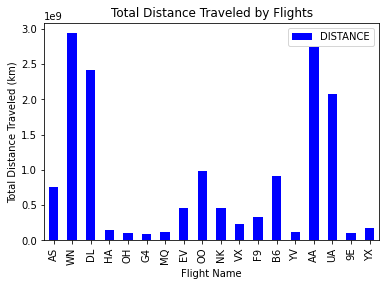

CPU times: user 2min 33s, sys: 15.3 s, total: 2min 48s
Wall time: 1min 28s


In [16]:
%%time


flights_distance = vdf.groupby('OP_CARRIER').agg({'DISTANCE': 'sum'})
flights_distance = flights_distance.to_pandas_df()
flights_distance.plot.bar(x='OP_CARRIER', y='DISTANCE', color='blue')
plt.xlabel("Flight Name")
plt.ylabel("Total Distance Traveled (km)")
plt.title("Total Distance Traveled by Flights")
plt.show()


Using Pyspark

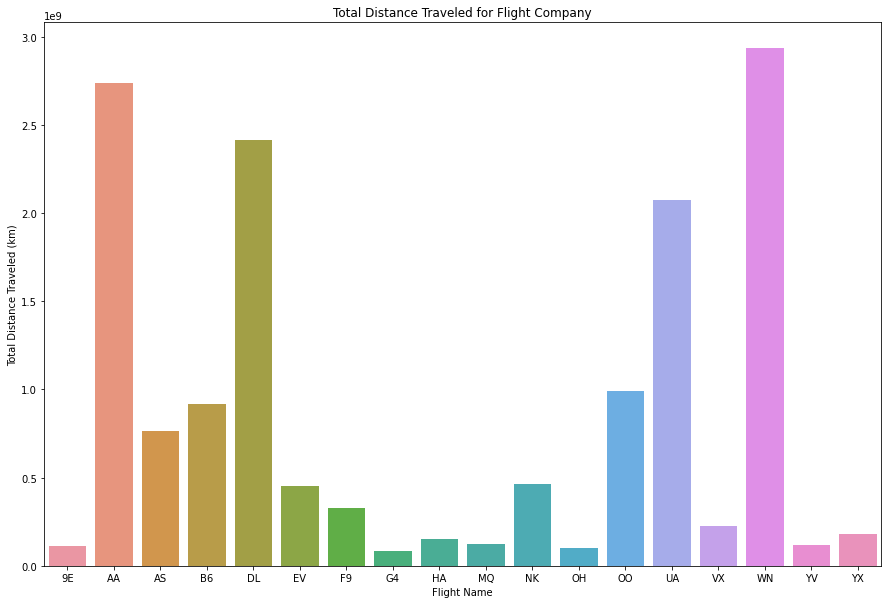

CPU times: user 879 ms, sys: 79.5 ms, total: 958 ms
Wall time: 1min 23s


In [43]:
%%time

import seaborn as sns

pyspark_chart1 = pdf.groupby("OP_CARRIER").sum("DISTANCE")
pyspark_chart1 = pyspark_chart1.sort(col("OP_CARRIER").asc())
pyspark_chart1 = pyspark_chart1.toPandas()


plt.figure(figsize=(15,10))
plt.title("Total Distance Traveled for Flight Company")
sns.barplot(x=pyspark_chart1['OP_CARRIER'], y=pyspark_chart1['sum(DISTANCE)'])
plt.xlabel('Flight Name')
plt.ylabel('Total Distance Traveled (km)')
plt.show()

***Question 1: Which airline has the highest number of flights from year 2016 - 2018?***

**Visualisation with Koalas**

In [ ]:
%time
flights_count = kdf.groupby('OP_CARRIER').size()
flights_count.plot(kind='bar')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.5 µs


**Visualisation with Vaex**

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


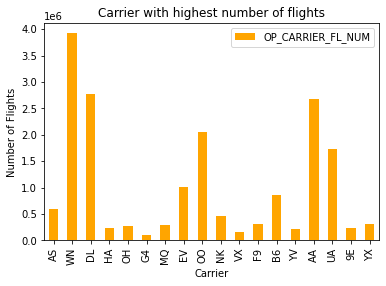

In [ ]:
%time

flights_count = vdf.groupby('OP_CARRIER').agg({'OP_CARRIER_FL_NUM': 'count'})
flights_count = flights_count.to_pandas_df()
flights_count.plot.bar(x='OP_CARRIER', y='OP_CARRIER_FL_NUM', color='orange')
plt.xlabel("Carrier")
plt.ylabel("Number of Flights")
plt.title("Carrier with highest number of flights")
plt.show()


**Visualisation using Pyspark**



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


<AxesSubplot: xlabel='OP_CARRIER'>

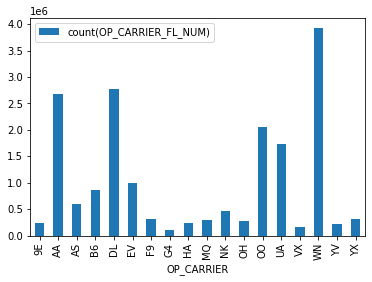

In [47]:
%time
from pyspark.sql.functions import count, desc
carrier_counts = pdf.groupBy("OP_CARRIER").agg(count("OP_CARRIER_FL_NUM")).sort(col("OP_CARRIER").asc()).toPandas()

# plot the total distance travelled by each flight company name using a bar chart
carrier_counts.plot(kind='bar', x='OP_CARRIER', y='count(OP_CARRIER_FL_NUM)')

From the bar chart above, we can see the number of flights for each operating carrier (airline). It could be concluded that WN airline has the highest number of flights among all airline.



***Question 2: Does the departure delay affects the arrival delay?***

**Visualisation with Koalas**

In [ ]:
%time
kdf.plot(x='DEP_DELAY', y='ARR_DELAY', kind='scatter')

**Visualisation with Vaex**

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


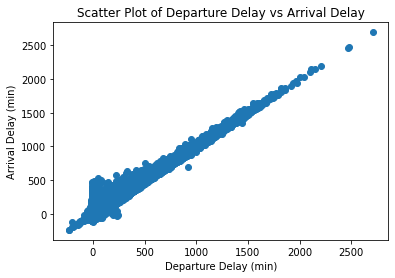

In [ ]:
%time
pandas_vdf = vdf[['DEP_DELAY', 'ARR_DELAY']].to_pandas_df()

plt.scatter(pandas_vdf['DEP_DELAY'], pandas_vdf['ARR_DELAY'])
plt.xlabel('Departure Delay (min)')
plt.ylabel('Arrival Delay (min)')
plt.title('Scatter Plot of Departure Delay vs Arrival Delay')

plt.show()


**Visualisation with Pyspark**

In [ ]:
%time
sample_pdf=pdf.select(['DEP_DELAY','ARR_DELAY']).sample(False,0.5,42)
pandas_pdf= sample_pdf.toPandas()
plt.scatter(pandas_pdf['DEP_DELAY'], pandas_pdf['ARR_DELAY'])
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Scatter Plot of Departure Delay vs Arrival Delay')
plt.show()

This shows the relationship between the departure delay and arrival delay of flights. When the arrival delay  tends to increase as the departure delay variable increases, we say there is a positive correlation between the variables.

***Question 3: Which carrier has the highest total flight distance ?***

**Visualisation with Koalas**

In [ ]:
%time
kdf.groupby(['OP_CARRIER'])['DISTANCE'].mean().plot(kind='bar')


**Visualisation with Vaex**

In [ ]:
%time
import matplotlib.pyplot as plt

carrier_distance = vdf.groupby('OP_CARRIER').agg({'DISTANCE': 'sum'})
pandas_vdf = carrier_distance.to_pandas_df()
pandas_vdf.plot.bar(x='OP_CARRIER', y='DISTANCE', color='orange')
plt.show()



**Visualisation with Pyspark**

In [ ]:
%time
import pyspark.sql.functions as F
pdf.groupBy("OP_CARRIER").agg(F.avg("DISTANCE").alias("Total flight distance")).sort("Total flight distance").show()

This bar chart shows the distribution of flight distances by carrier. From the bar chart above, VX airline has the highest total flight distance among all airlines.

***Question 4: What is the average departure delay for each origin airport ?***

**Visualisation with Koalas**

In [ ]:
%time
kdf.groupby(['ORIGIN'])['DEP_DELAY'].mean().plot(kind='bar')

**Visualisation with Vaex**

In [ ]:
%time
flights_avg_delay = vdf.groupby('ORIGIN').agg({'DEP_DELAY': 'mean'})
pandas_avg_delay = flights_avg_delay.to_pandas_df()
pandas_avg_delay.plot.bar(x='ORIGIN', y='DEP_DELAY', color='red')
plt.xlabel("Origin airport")
plt.ylabel("Avg Departure Delays")
plt.title("Average departure delay for each origin airport")
plt.show()


**Visualisation using Pyspark**



In [ ]:
%time
import pyspark.sql.functions as F
pdf.groupBy("ORIGIN").agg(F.avg("DEP_DELAY").alias("Avg Departure Delay")).sort("Avg Departure Delay").show()

From the bar chart above, we can see that some of the bar shows positive values and some are negative values. Positive values stand for the departure delay of the flight at the responding airport. While negative values means the time that the flight departs early. In conclusion, YNG airport has the highest departure delay and YAK airport has the lowest departure delay, in other words, YAK airport has the most earliest departure time than the original scheduled departure time.

***Question 5: What is the average arrival delay for every destination airport?***

**Visualisation with Koalas**

In [ ]:
%time
kdf.groupby(['DEST'])['ARR_DELAY'].mean().plot(kind='bar')

**Visualisation with Vaex**

In [ ]:
%time
flights_avg_adelay = vdf.groupby('DEST').agg({'ARR_DELAY': 'mean'})
pandas_avg_adelay = flights_avg_adelay.to_pandas_df()
pandas_avg_adelay.plot.bar(x='DEST', y='ARR_DELAY', color='green')
plt.xlabel("Destination airport")
plt.ylabel("Avg Arrival Delays")
plt.title("Average arrival delay for each destination airport")
plt.show()


**Visualisation using Pyspark**



In [ ]:
%time
import pyspark.sql.functions as F
pdf.groupBy("DEST").agg(F.avg("ARR_DELAY").alias("Avg Arrival Delay")).sort("Avg Arrival Delay").show()

From the bar chart above, we can see that some of the bar shows positive values and some are negative values. Positive values stand for the arrival delay of the flight at the responding airport. While negative values means the time that the flight arrive early. In conclusion, YNG airport has the highest arrival delay and YAK airport has the lowest arrival delay, in other words, DRT airport has the most earliest arrival time than the original scheduled arrival time.